In [1]:
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from gower.gower_dist import *


# Adjusted Rand Index/Adjusted Mutual Information

The algorithms select the maximum point on the green line (Gini Robustness). ARI and AMI are the brown and pink lines, respectively.

Maximizing Gini Robustness results in higher values of ARI and AMI relative to other values of the hyperparameter.

0it [00:00, ?it/s]

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] []


  0%|          | 0/8124 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

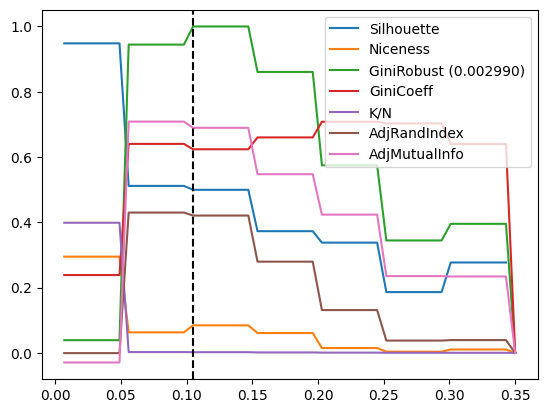

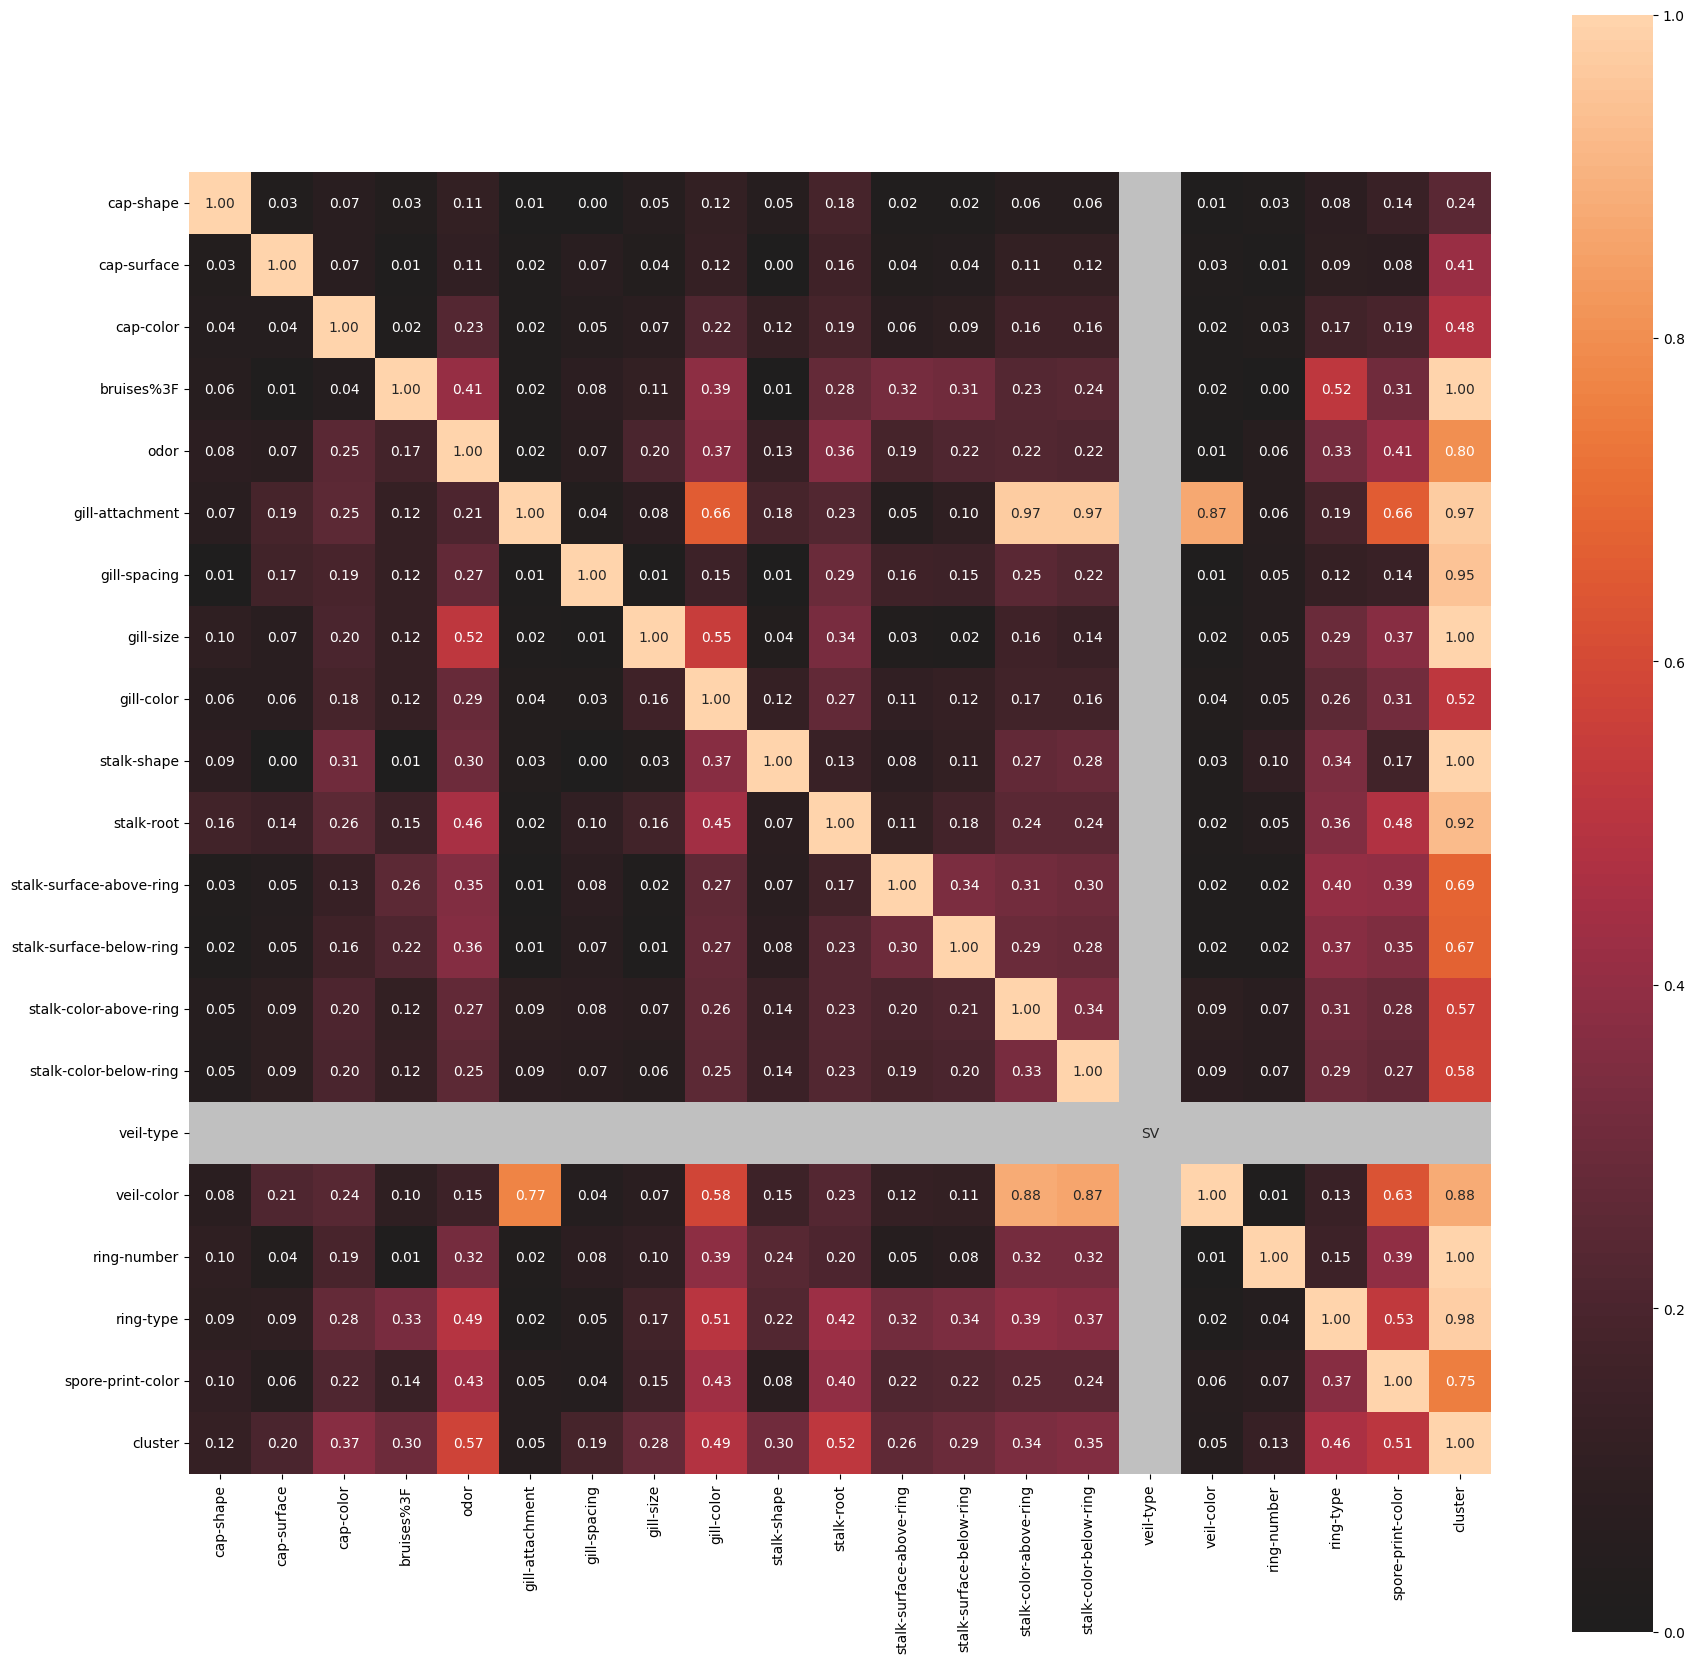

{'Silhouette': 0.49972043102894637, 'Niceness': 0.08456242213377871, 'GiniRobust': 0.0029900303551711714, 'GiniCoeff': 0.6238565394283345, 'K/N': 0.0023387493845396356, 'sample': {'eps': 0.105, 'min_samples': 1}, 'counts_dict': {0: 256, 1: 704, 2: 768, 3: 288, 4: 96, 5: 1728, 6: 1296, 7: 288, 8: 296, 9: 1728, 10: 48, 11: 48, 12: 32, 13: 8, 14: 192, 15: 288, 16: 36, 17: 8, 18: 16}, 'AdjRandIndex': 0.4208700098516902, 'AdjMutualInfo': 0.6896064616092143}


In [2]:
mushrooms = pd.read_csv('mushroom.csv')

mushrooms_ = optimize_dbscan(mushrooms.iloc[:, :-3],
                             mushrooms.iloc[:, -3] + mushrooms.iloc[:, -2] + mushrooms.iloc[:, -1],
                             factor=0.35,
                             n_iter=50,
                             precomputed=True,
                             # weight_cat=[cluster_niceness(np.unique(mushrooms.iloc[:, i], return_counts=True)[1])
                             #             for i in range(mushrooms.shape[1] - 3)],
                             chunksize=20)


  0%|          | 0/34 [00:00<?, ?it/s]

[] [1.73205081 1.73205081 1.73205081 1.73205081 1.73205081 1.73205081
 1.73205081 1.73205081 1.73205081 1.73205081 1.         1.73205081
 1.41421356 1.73205081 1.73205081 1.73205081 1.73205081 1.73205081
 1.73205081 1.73205081 1.73205081 1.73205081 1.73205081 1.73205081
 1.73205081 1.73205081 1.73205081 1.73205081 1.73205081 1.73205081
 1.73205081 1.73205081 1.73205081 7.09106267]


  0%|          | 0/366 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

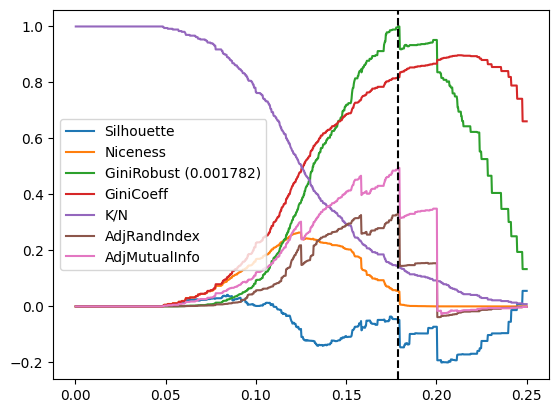

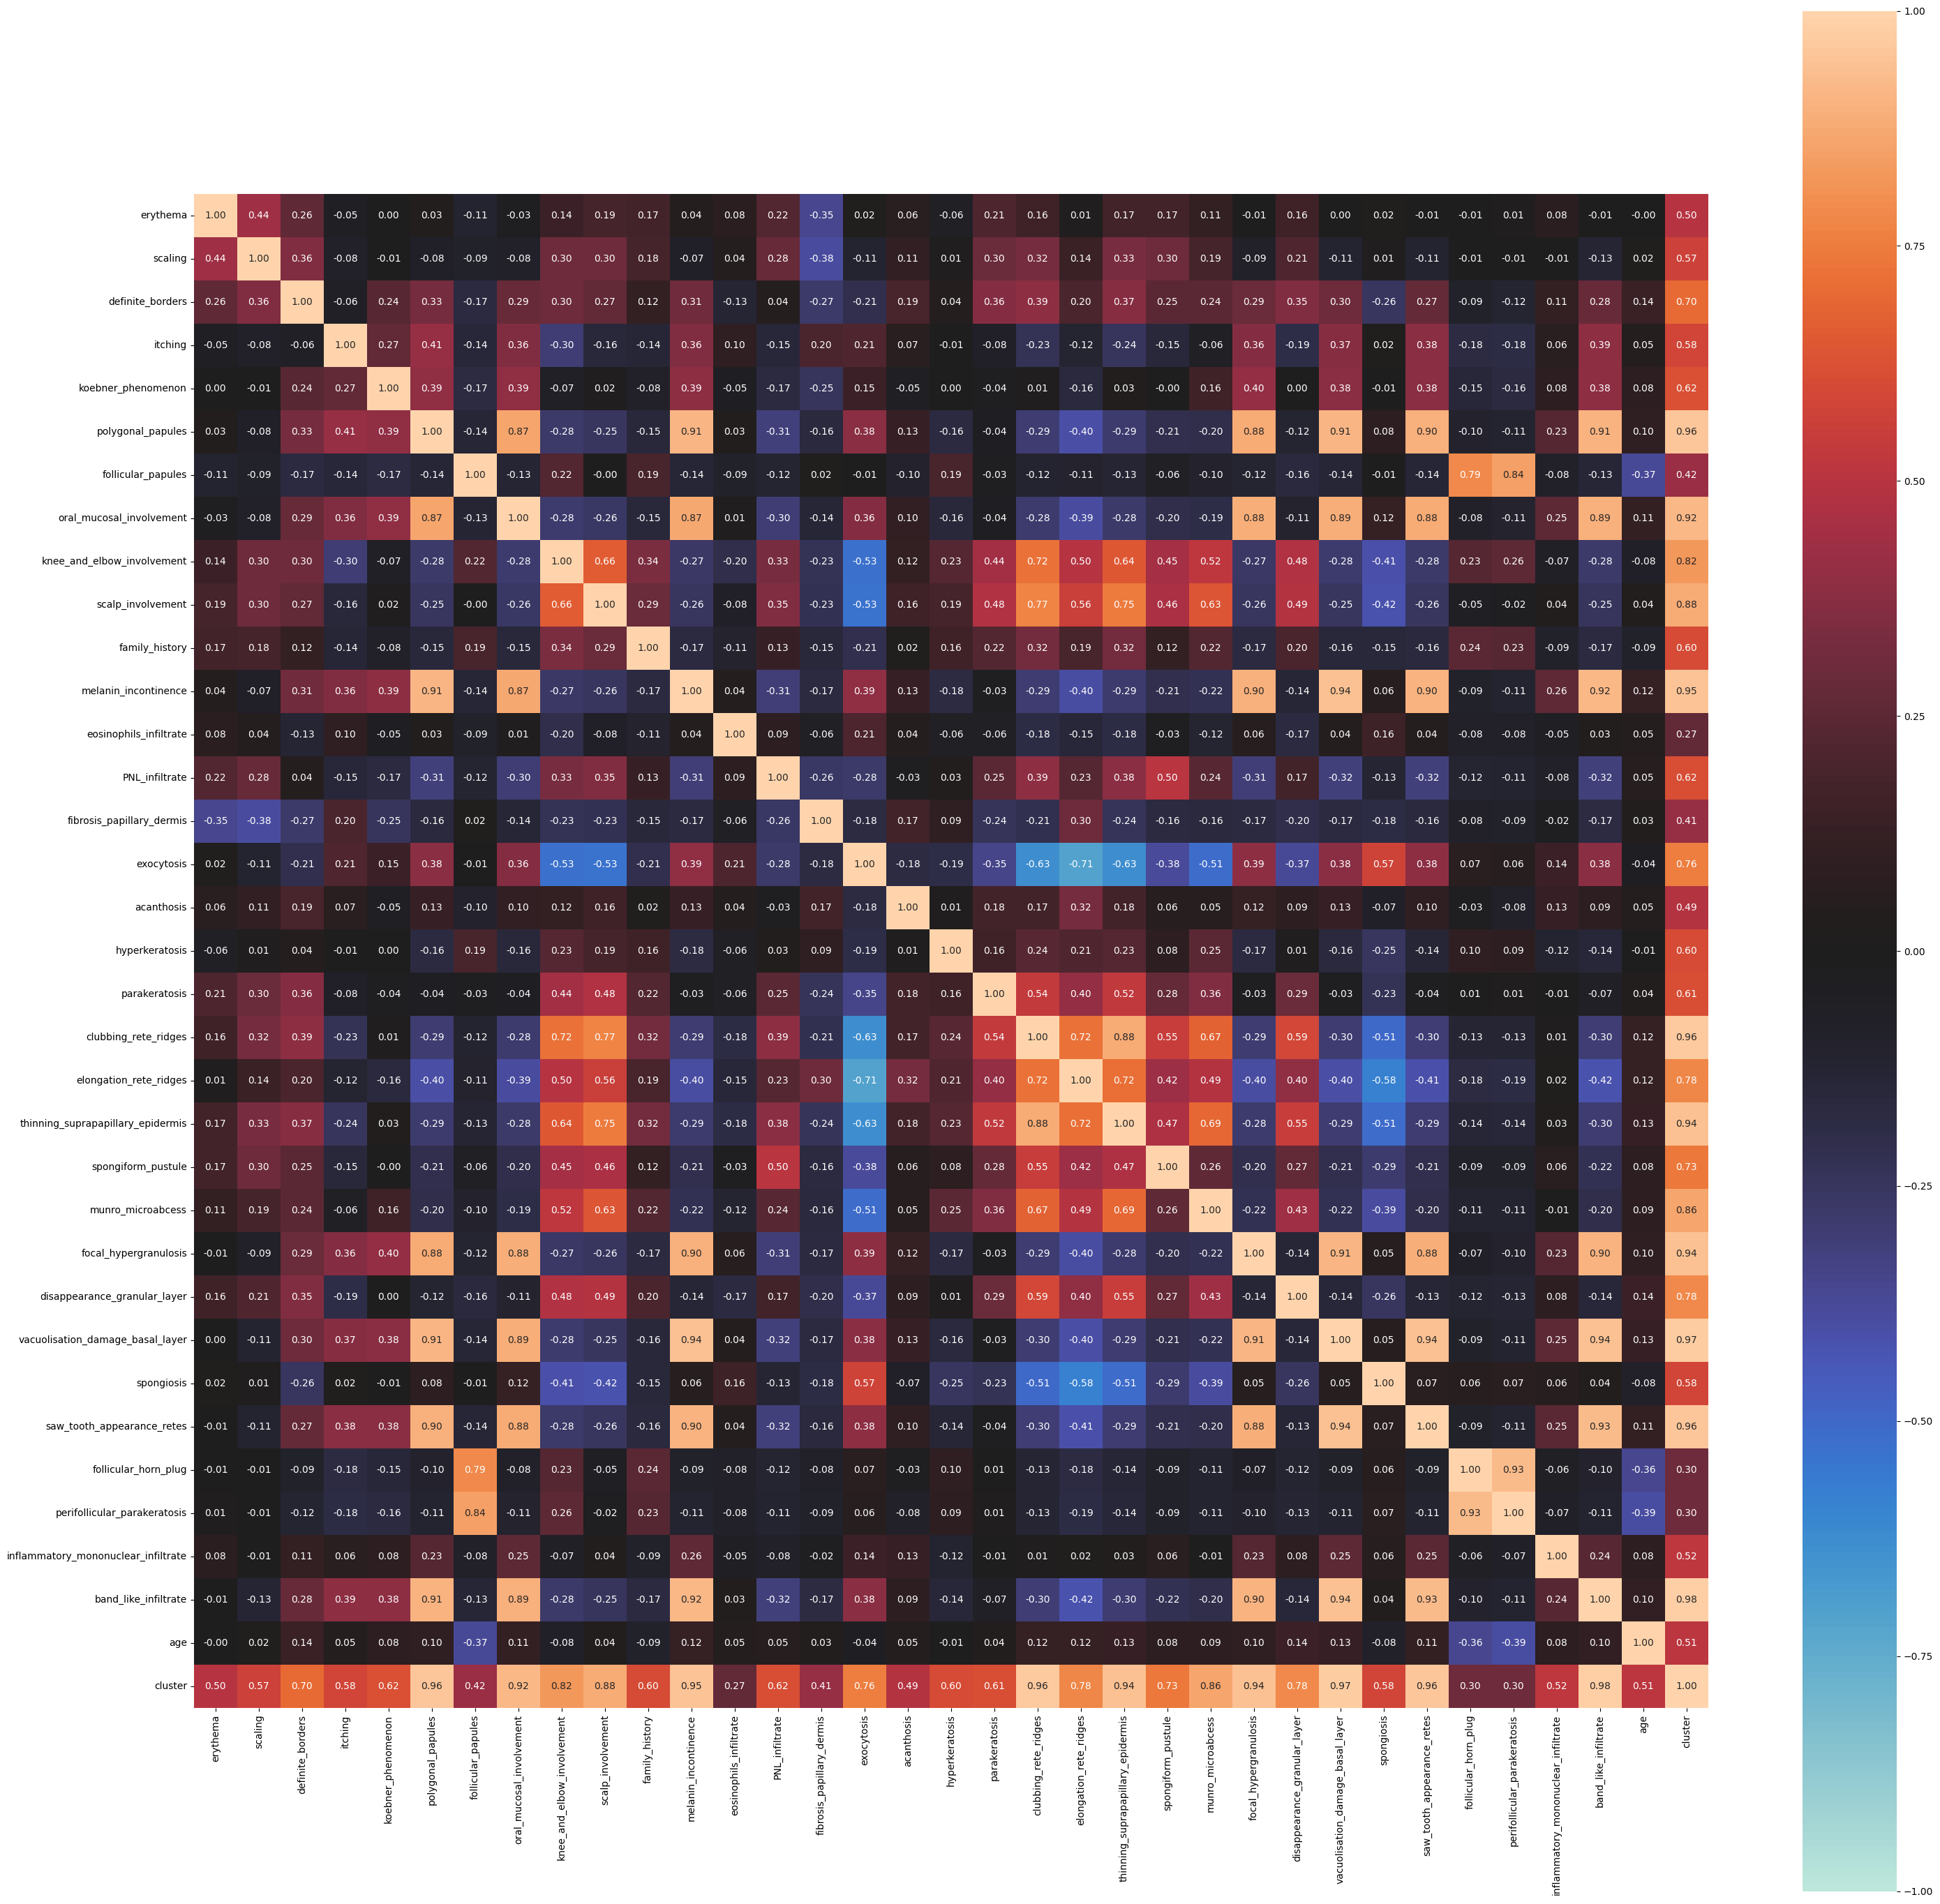

{'Silhouette': -0.04834770638257858, 'Niceness': 0.05309499838167242, 'GiniRobust': 0.0017824691588193848, 'GiniCoeff': 0.8187263556116016, 'K/N': 0.14207650273224043, 'sample': {'eps': 0.179, 'min_samples': 1}, 'counts_dict': {0: 183, 1: 1, 2: 67, 3: 59, 4: 1, 5: 2, 6: 1, 7: 1, 8: 1, 9: 1, 10: 1, 11: 1, 12: 1, 13: 1, 14: 1, 15: 1, 16: 1, 17: 1, 18: 1, 19: 5, 20: 1, 21: 1, 22: 1, 23: 1, 24: 1, 25: 1, 26: 1, 27: 1, 28: 1, 29: 1, 30: 1, 31: 1, 32: 1, 33: 1, 34: 1, 35: 1, 36: 2, 37: 1, 38: 1, 39: 2, 40: 1, 41: 2, 42: 1, 43: 1, 44: 1, 45: 1, 46: 1, 47: 1, 48: 1, 49: 1, 50: 1, 51: 1}, 'AdjRandIndex': 0.33426689901218615, 'AdjMutualInfo': 0.49485797978083473}


In [3]:
derm = pd.read_csv("dermatology_database_1.csv")
derm.loc[derm.age == "?", "age"] = derm.age[derm.age != "?"].median()
derm.age = derm.age.astype(int)

derm_ = optimize_dbscan(derm.drop("class", axis=1), derm["class"], factor=0.25, precomputed=True, lower_q=0.2, chunksize=20)


/var/folders/cw/4c395x2x5v196hz5867xdvfc0000gn/T/ipykernel_56207/4159904366.py:2: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  hepatitis.fillna(hepatitis.median(), inplace=True)


  0%|          | 0/12 [00:00<?, ?it/s]

[1.] [24.77902339  6.64757281  6.58762012  4.0254276   5.44329618  6.08825329
  3.85775731 12.87066965 11.51110597  2.3124988   5.33778199  9.3345997 ]


  0%|          | 0/615 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

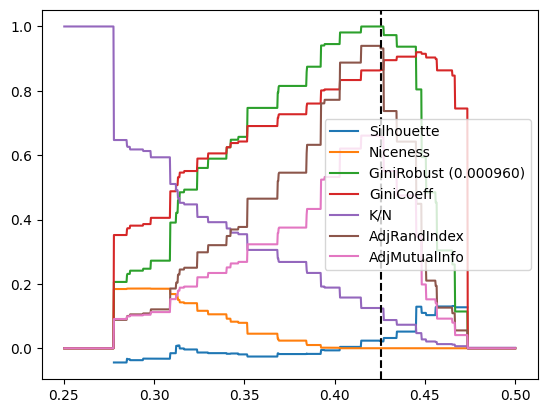

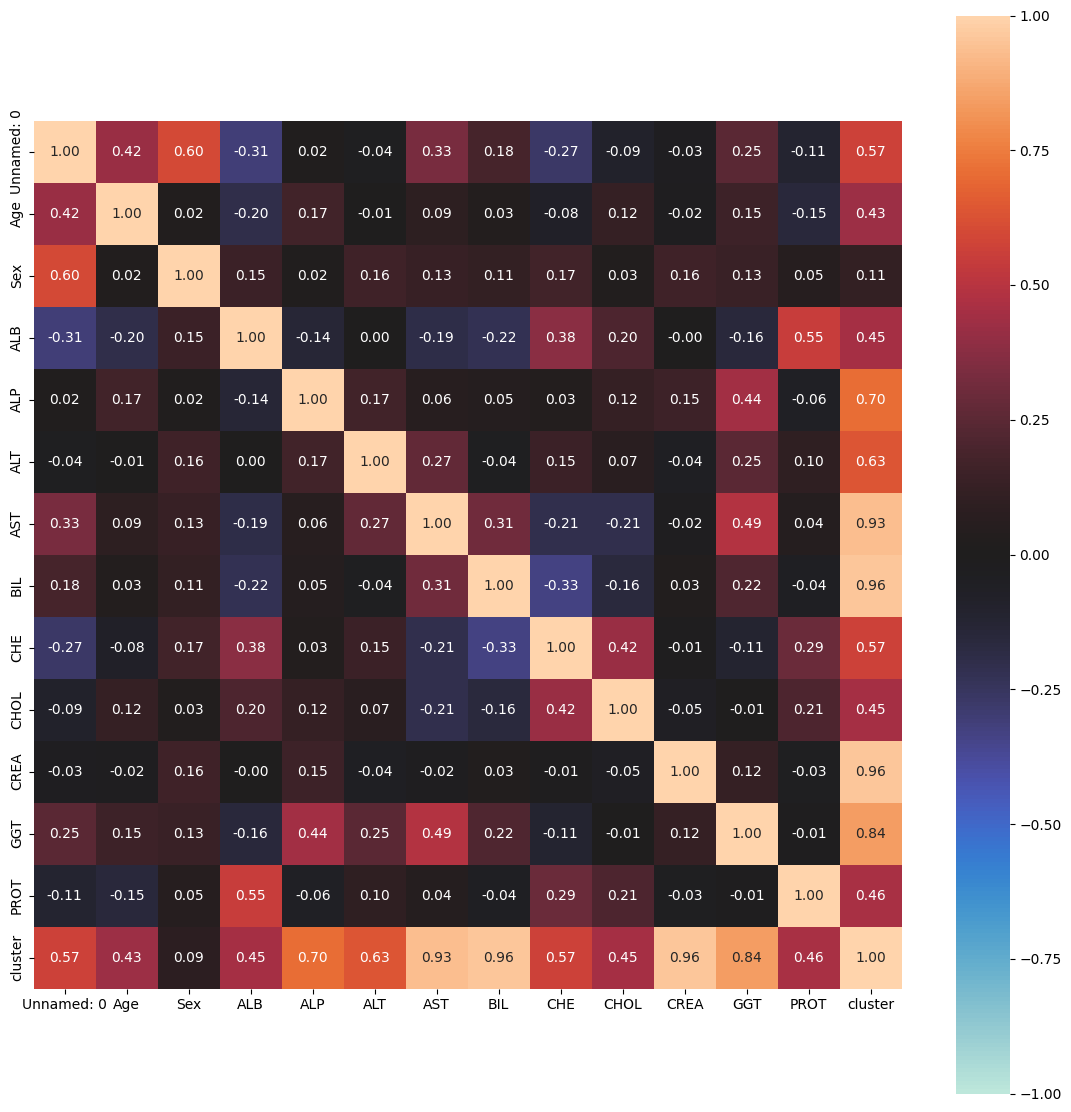

{'Silhouette': 0.021368227098524494, 'Niceness': 4.394825686176729e-06, 'GiniRobust': 0.0009601891344794174, 'GiniCoeff': 0.8648908857509627, 'K/N': 0.12357723577235773, 'sample': {'eps': 0.4255}, 'counts_dict': {-75: 1, -74: 1, -73: 1, -72: 1, -71: 1, -70: 1, -69: 1, -68: 1, -67: 1, -66: 1, -65: 1, -64: 1, -63: 1, -62: 1, -61: 1, -60: 1, -59: 1, -58: 1, -57: 1, -56: 1, -55: 1, -54: 1, -53: 1, -52: 1, -51: 1, -50: 1, -49: 1, -48: 1, -47: 1, -46: 1, -45: 1, -44: 1, -43: 1, -42: 1, -41: 1, -40: 1, -39: 1, -38: 1, -37: 1, -36: 1, -35: 1, -34: 1, -33: 1, -32: 1, -31: 1, -30: 1, -29: 1, -28: 1, -27: 1, -26: 1, -25: 1, -24: 1, -23: 1, -22: 1, -21: 1, -20: 1, -19: 1, -18: 1, -17: 1, -16: 1, -15: 1, -14: 1, -13: 1, -12: 1, -11: 1, -10: 1, -9: 1, -8: 1, -7: 1, -6: 1, -5: 1, -4: 1, -3: 1, -2: 1, -1: 1, 0: 540}, 'AdjRandIndex': 0.9318230443201668, 'AdjMutualInfo': 0.6563624989626716}


In [4]:
hepatitis = pd.read_csv('hcvdat0.csv')
hepatitis.fillna(hepatitis.median(), inplace=True)

hepatitis_ = optimize_cluster_optics_dbscan(hepatitis.drop("Category", axis=1), hepatitis.Category,
                                            factor=0.25, offset=0.25, metric="precomputed", chunksize=20)


  0%|          | 0/4 [00:00<?, ?it/s]

[] [5.77334302 4.62402089 5.63255977 4.36449454]


  0%|          | 0/150 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

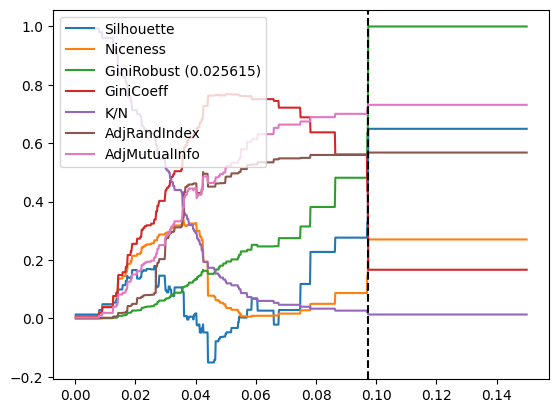

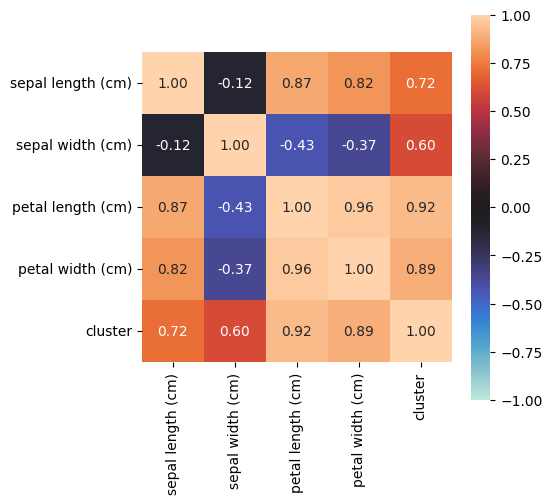

{'Silhouette': 0.6494683899193391, 'Niceness': 0.2704604043237575, 'GiniRobust': 0.025614844881630724, 'GiniCoeff': 0.16666666666666666, 'K/N': 0.013333333333333334, 'sample': {'eps': 0.09734999999999999, 'min_samples': 1}, 'counts_dict': {0: 50, 1: 100}, 'AdjRandIndex': 0.5681159420289855, 'AdjMutualInfo': 0.7315847607219574}


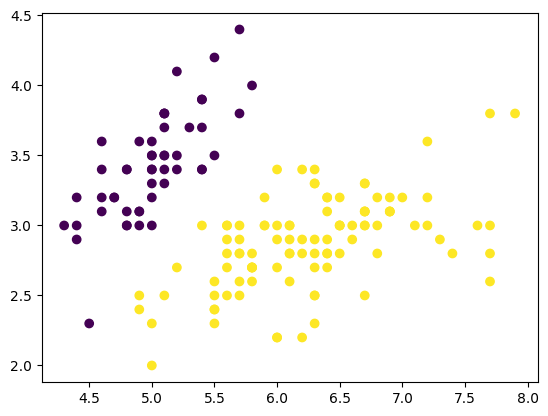

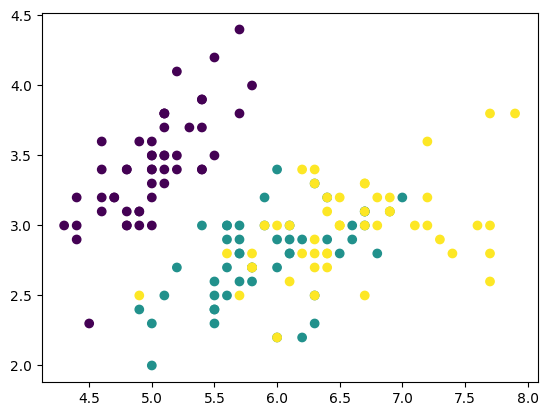

In [5]:
iris = load_iris()
iris_y = iris.target
iris = pd.DataFrame(iris.data, columns=iris.feature_names)
iris = optimize_dbscan(iris, iris_y, factor=0.15, precomputed=True, chunksize=20)

plt.scatter(iris.iloc[:, 0], iris.iloc[:, 1], c=iris.cluster.astype(int))
plt.show()
plt.scatter(iris.iloc[:, 0], iris.iloc[:, 1], c=iris_y)
plt.show()


  0%|          | 0/14 [00:00<?, ?it/s]

[1.] [6.39970864 7.28787297 6.79107961 5.468764   2.37841423 3.62279156
 7.09840555 7.85788398 4.12310563 3.26325245 4.96876639 2.15212666
 2.25143734 2.26535268]


  0%|          | 0/515 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

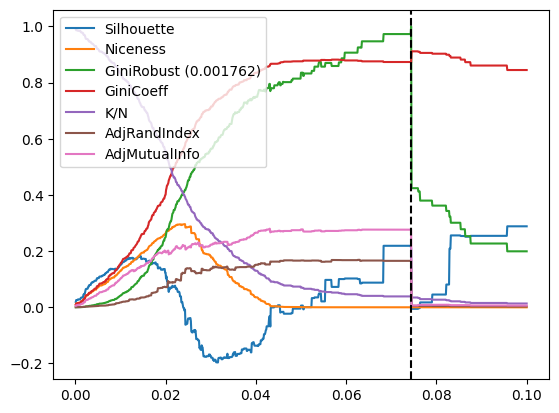

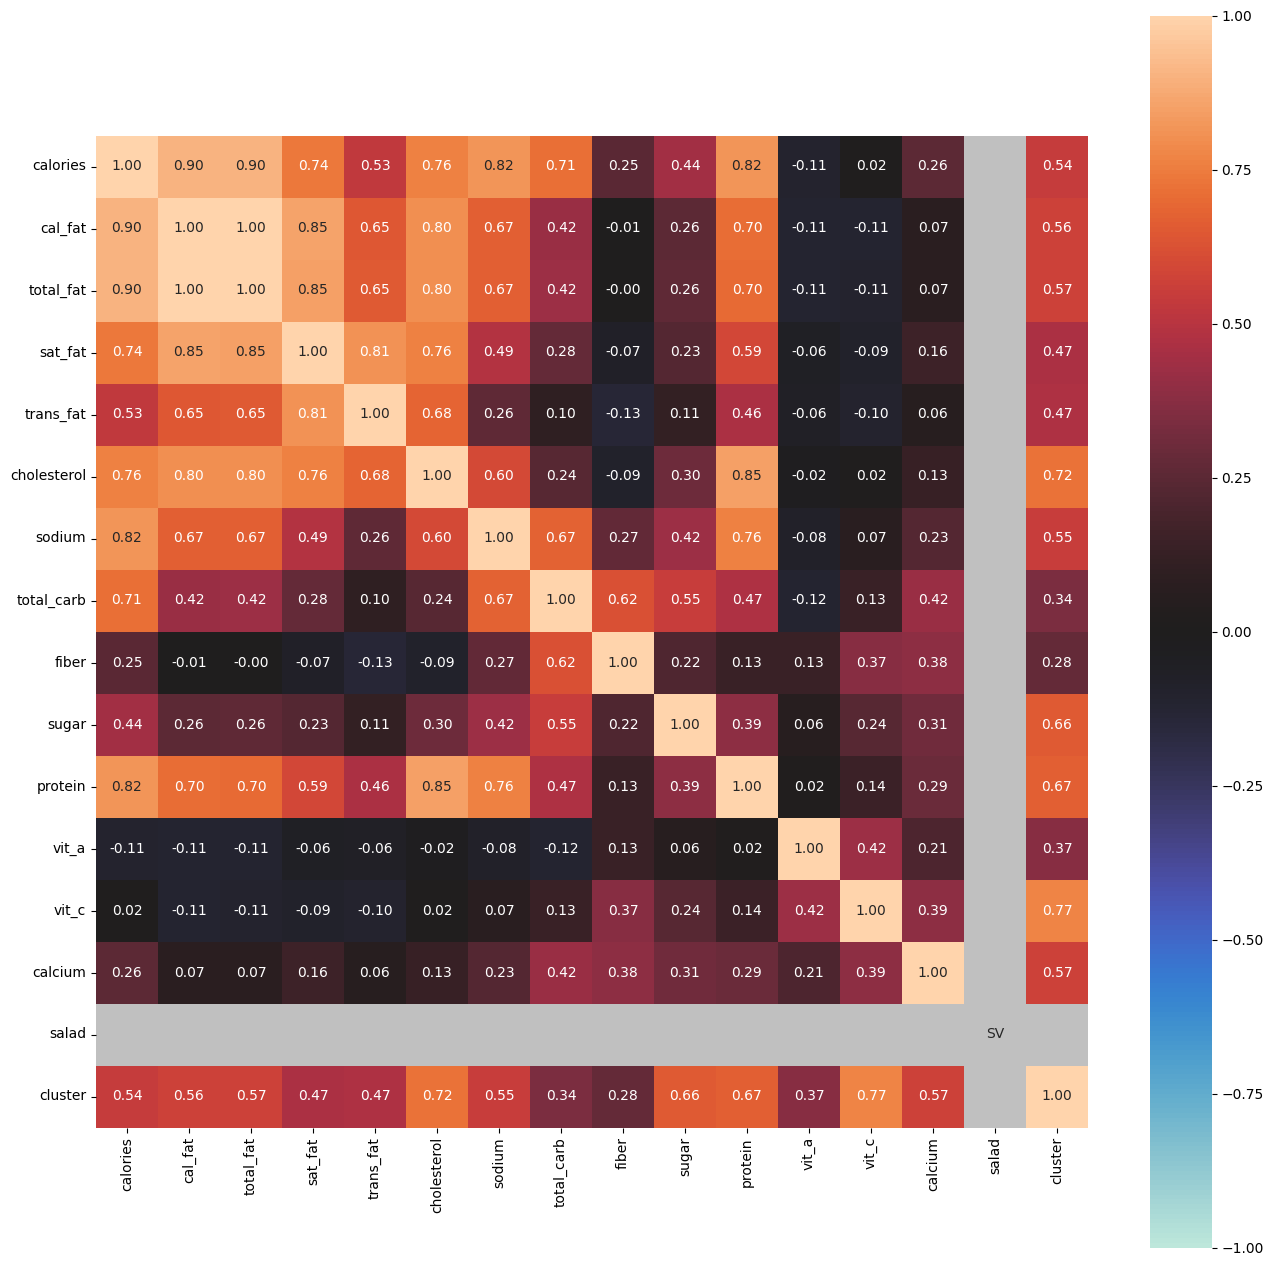

{'Silhouette': 0.21032267226736417, 'Niceness': 9.821950483385194e-06, 'GiniRobust': 0.0017624250285275492, 'GiniCoeff': 0.8709248850281043, 'K/N': 0.036893203883495145, 'sample': {'eps': 0.07440000000000001, 'min_samples': 1}, 'counts_dict': {0: 294, 1: 1, 2: 1, 3: 1, 4: 1, 5: 1, 6: 1, 7: 1, 8: 204, 9: 1, 10: 1, 11: 1, 12: 1, 13: 1, 14: 1, 15: 1, 16: 1, 17: 1, 18: 1}, 'AdjRandIndex': 0.1675958664823228, 'AdjMutualInfo': 0.2781215631295336}


In [6]:
fastfood = pd.read_csv("fastfood.csv", index_col=1)

fastfood_ = optimize_dbscan(fastfood.drop("restaurant", axis=1), fastfood.restaurant,
                            factor=0.1, precomputed=True, chunksize=20)


  0%|          | 0/2048 [00:00<?, ?it/s]

[] [1. 1. 1. ... 1. 1. 1.]


  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

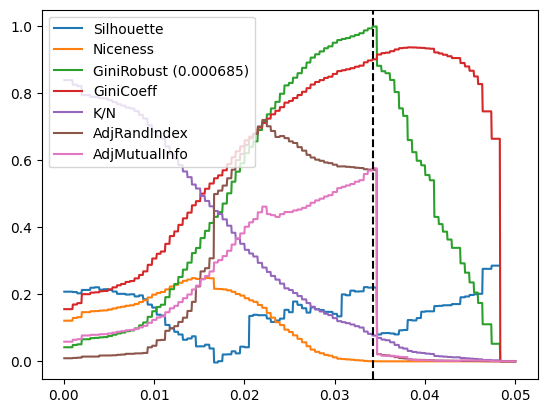

{'Silhouette': 0.2205110952706202, 'Niceness': 0.00030551988027023087, 'GiniRobust': 0.0006854203847923025, 'GiniCoeff': 0.9019480519480519, 'K/N': 0.077, 'sample': {'eps': 0.0342, 'min_samples': 1}, 'counts_dict': {0: 585, 1: 336, 2: 1, 3: 1, 4: 1, 5: 1, 6: 2, 7: 1, 8: 1, 9: 1, 10: 1, 11: 1, 12: 1, 13: 1, 14: 1, 15: 1, 16: 1, 17: 1, 18: 1, 19: 1, 20: 1, 21: 1, 22: 1, 23: 1, 24: 1, 25: 1, 26: 1, 27: 2, 28: 2, 29: 1, 30: 1, 31: 1, 32: 1, 33: 1, 34: 1, 35: 1, 36: 1, 37: 1, 38: 1, 39: 1, 40: 1, 41: 1, 42: 1, 43: 1, 44: 1, 45: 1, 46: 1, 47: 1, 48: 1, 49: 1, 50: 2, 51: 1, 52: 1, 53: 1, 54: 1, 55: 1, 56: 1, 57: 1, 58: 1, 59: 1, 60: 1, 61: 1, 62: 1, 63: 1, 64: 1, 65: 1, 66: 1, 67: 1, 68: 1, 69: 1, 70: 1, 71: 1, 72: 1, 73: 1, 74: 1, 75: 1, 76: 1}, 'AdjRandIndex': 0.5718614861887976, 'AdjMutualInfo': 0.5765801758305316}


In [7]:
polymers = pd.read_csv('polymers_dataset.csv', index_col=0).drop("smiles", axis=1).sample(n=1000, random_state=0)

polymers_ = optimize_dbscan(polymers.drop("label", axis=1), polymers.label, factor=0.05, precomputed=True, chunksize=20)


  0%|          | 0/10 [00:00<?, ?it/s]

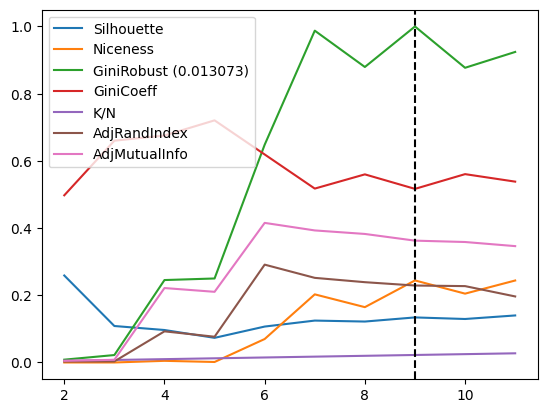

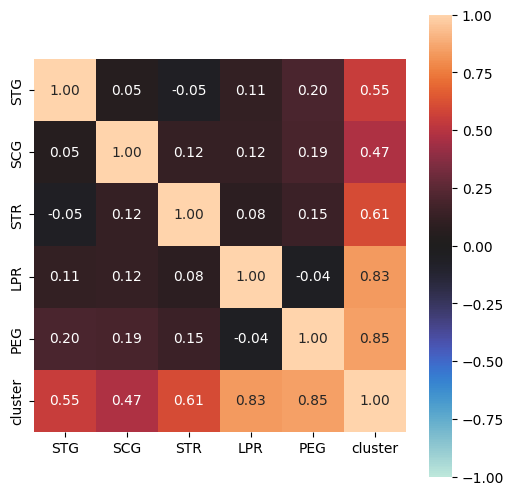

{'Silhouette': 0.13410881359345492, 'Niceness': 0.24417775489521956, 'GiniRobust': 0.013073047642384043, 'GiniCoeff': 0.5166804521643231, 'K/N': 0.022332506203473945, 'sample': {'n_clusters': 9, 'linkage': 'average'}, 'counts_dict': {0: 17, 1: 96, 2: 123, 3: 13, 4: 23, 5: 2, 6: 82, 7: 1, 8: 46}, 'AdjRandIndex': 0.2290322983762663, 'AdjMutualInfo': 0.36260949919452673}


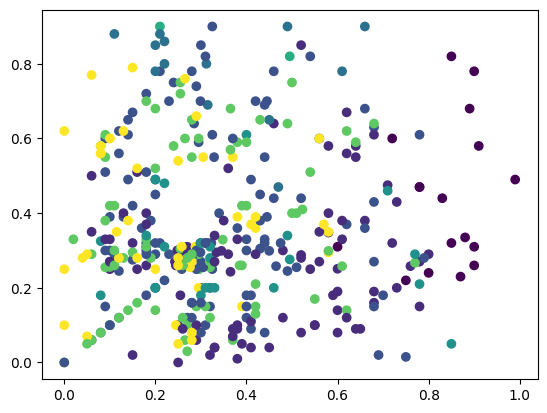

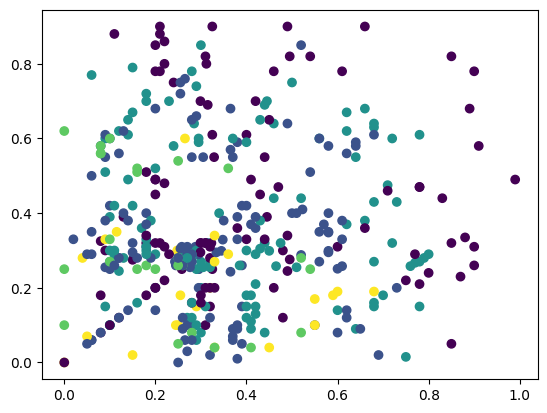

In [8]:
knowledge = pd.read_excel("Predict_student_ knowledge_level.xls")

knowledge_ = optimize_agglo(knowledge.iloc[:, :-1], knowledge.iloc[:, -1])

plt.scatter(knowledge.iloc[:, 0], knowledge.iloc[:, 1], c=knowledge_.cluster.astype(int))
plt.show()
plt.scatter(knowledge.iloc[:, 0], knowledge.iloc[:, 1], c=LabelEncoder().fit_transform(knowledge.iloc[:, -1]))
plt.show()

In [9]:
seed = pd.read_csv("Seed_Data.csv")

  0%|          | 0/7 [00:00<?, ?it/s]

[] [11.17095021 11.02655914 10.30352261 10.52668977 10.83749064  9.59754658
  8.6403386 ]


  0%|          | 0/210 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

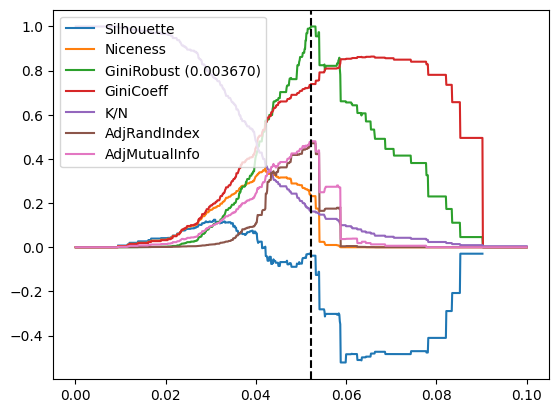

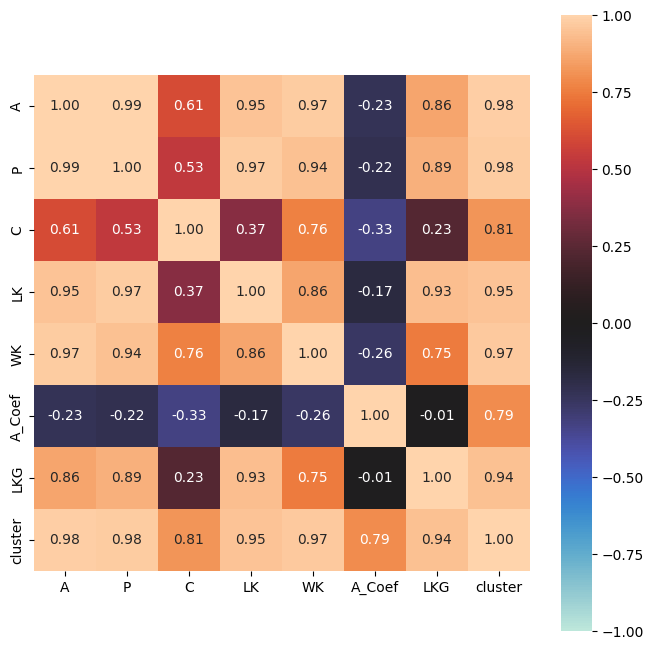

{'Silhouette': -0.038158165529647646, 'Niceness': 0.23148139317174216, 'GiniRobust': 0.0036701670058489197, 'GiniCoeff': 0.7392156862745098, 'K/N': 0.1619047619047619, 'sample': {'eps': 0.0522, 'min_samples': 1}, 'counts_dict': {0: 44, 1: 4, 2: 17, 3: 2, 4: 1, 5: 1, 6: 68, 7: 1, 8: 1, 9: 1, 10: 1, 11: 5, 12: 1, 13: 1, 14: 1, 15: 1, 16: 1, 17: 34, 18: 4, 19: 1, 20: 1, 21: 2, 22: 1, 23: 1, 24: 1, 25: 1, 26: 1, 27: 1, 28: 1, 29: 2, 30: 4, 31: 1, 32: 1, 33: 2}, 'AdjRandIndex': 0.47111542464404066, 'AdjMutualInfo': 0.48001839513323724}


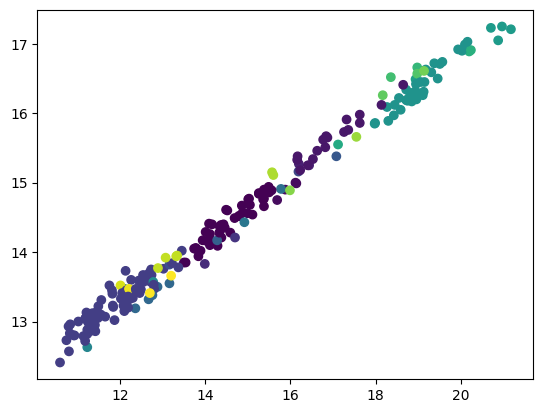

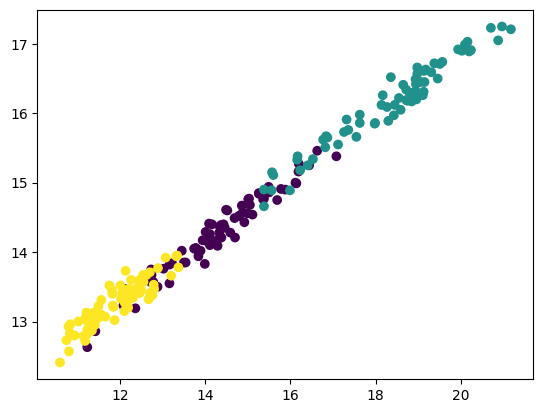

In [10]:
seed_ = optimize_dbscan(seed.iloc[:, :-1], seed.iloc[:, -1], factor=0.1, precomputed=True, chunksize=20)

plt.scatter(seed.iloc[:, 0], seed.iloc[:, 1], c=seed_.cluster.astype(int))
plt.show()
plt.scatter(seed.iloc[:, 0], seed.iloc[:, 1], c=seed.iloc[:, -1].astype(int).values)
plt.show()

  0%|          | 0/10 [00:00<?, ?it/s]

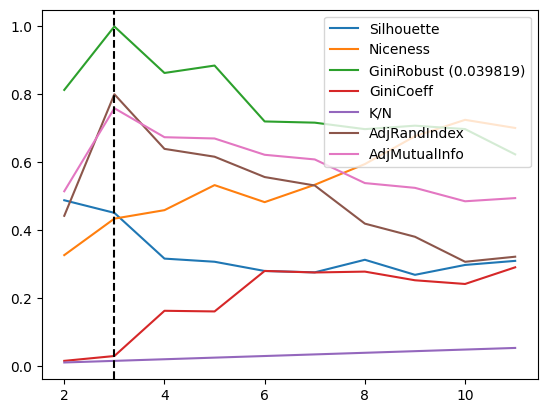

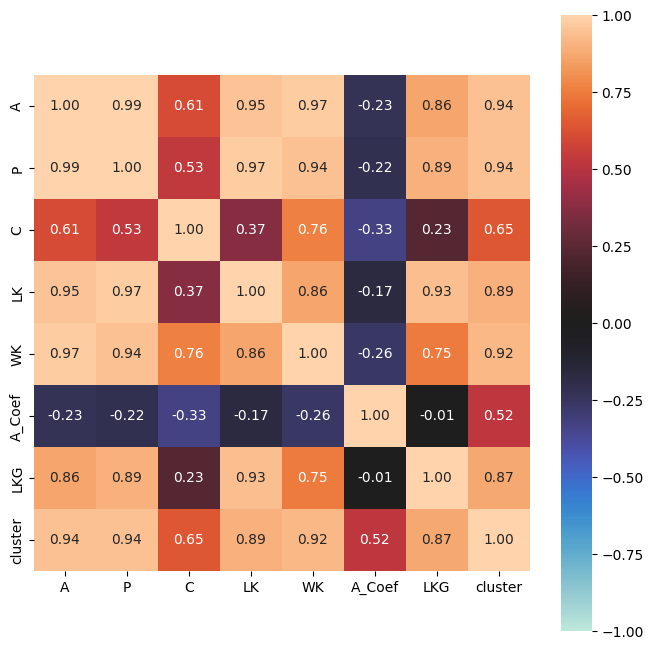

{'Silhouette': 0.45059821854490445, 'Niceness': 0.43353867266664897, 'GiniRobust': 0.039819330842672515, 'GiniCoeff': 0.02857142857142857, 'K/N': 0.014285714285714285, 'sample': {'n_components': 3, 'random_state': 42}, 'counts_dict': {0: 67, 1: 67, 2: 76}, 'AdjRandIndex': 0.8002139356626908, 'AdjMutualInfo': 0.7589957070769461}


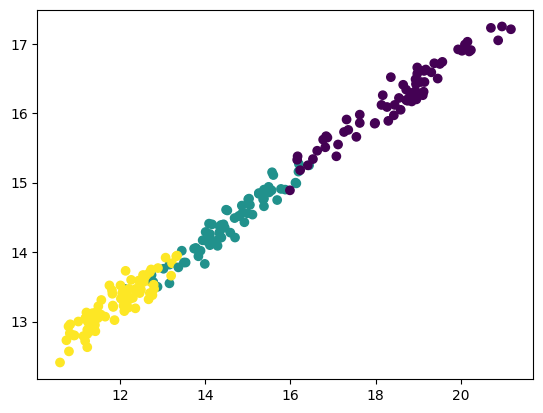

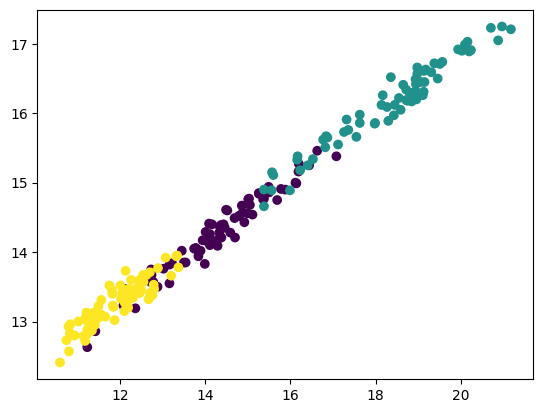

In [11]:
seed_ = optimize_gm(seed.iloc[:, :-1], seed.iloc[:, -1])

plt.scatter(seed.iloc[:, 0], seed.iloc[:, 1], c=seed_.cluster.astype(int))
plt.show()
plt.scatter(seed.iloc[:, 0], seed.iloc[:, 1], c=seed.iloc[:, -1].astype(int).values)
plt.show()


  0%|          | 0/4 [00:00<?, ?it/s]

[1. 1. 1. 1. 1.] [ 5.21938615 18.14443359 17.02443218  4.12310563]


  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

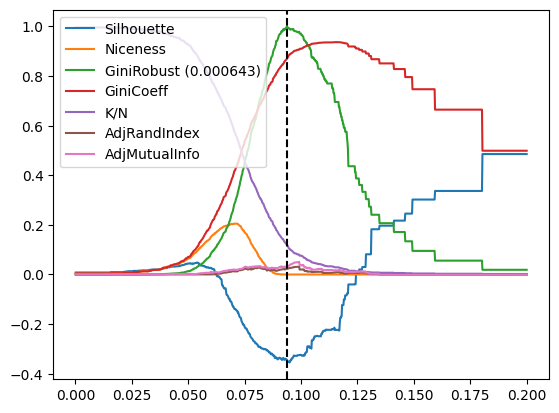

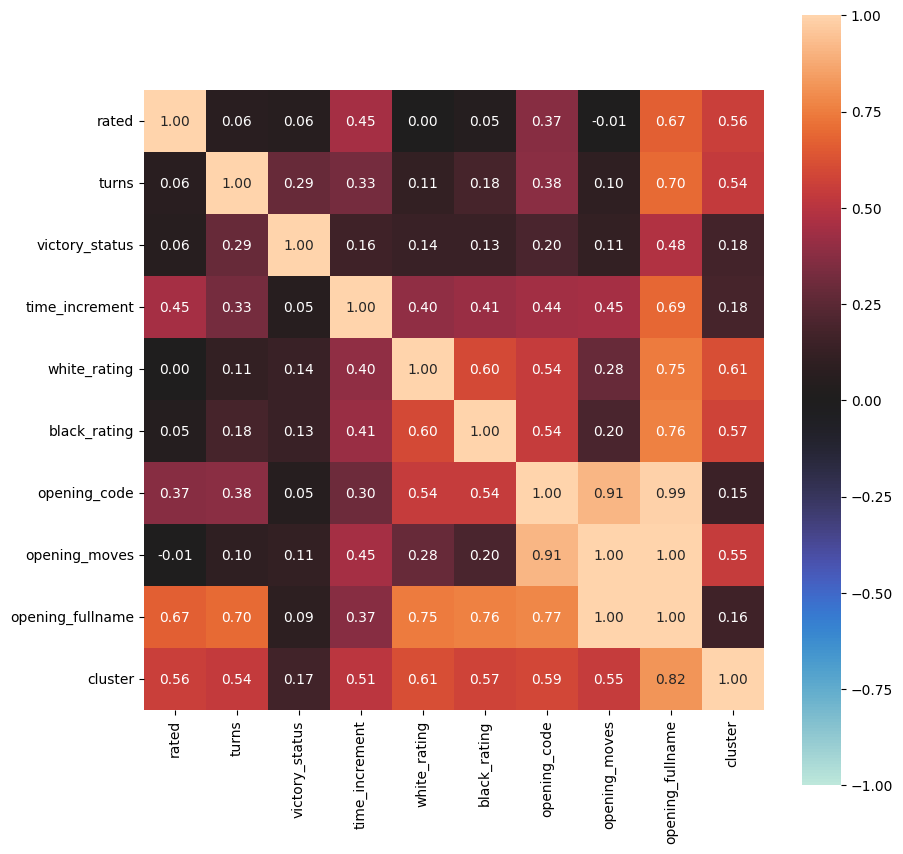

{'Silhouette': -0.3439138961458809, 'Niceness': 8.98712188632667e-06, 'GiniRobust': 0.0006434913894681782, 'GiniCoeff': 0.8703193277310924, 'K/N': 0.119, 'sample': {'eps': 0.09380000000000001, 'min_samples': 1}, 'counts_dict': {0: 856, 1: 1, 2: 3, 3: 1, 4: 1, 5: 1, 6: 4, 7: 1, 8: 1, 9: 2, 10: 1, 11: 1, 12: 1, 13: 1, 14: 1, 15: 1, 16: 1, 17: 1, 18: 2, 19: 1, 20: 1, 21: 1, 22: 2, 23: 1, 24: 1, 25: 1, 26: 2, 27: 1, 28: 2, 29: 2, 30: 3, 31: 1, 32: 1, 33: 3, 34: 1, 35: 1, 36: 1, 37: 1, 38: 2, 39: 1, 40: 2, 41: 1, 42: 2, 43: 1, 44: 1, 45: 1, 46: 1, 47: 4, 48: 1, 49: 1, 50: 1, 51: 1, 52: 2, 53: 1, 54: 1, 55: 1, 56: 1, 57: 2, 58: 1, 59: 1, 60: 1, 61: 1, 62: 1, 63: 1, 64: 1, 65: 3, 66: 1, 67: 1, 68: 1, 69: 1, 70: 1, 71: 1, 72: 1, 73: 1, 74: 1, 75: 1, 76: 1, 77: 1, 78: 1, 79: 2, 80: 1, 81: 1, 82: 1, 83: 1, 84: 1, 85: 1, 86: 1, 87: 1, 88: 1, 89: 1, 90: 1, 91: 1, 92: 1, 93: 1, 94: 1, 95: 1, 96: 1, 97: 1, 98: 1, 99: 1, 100: 1, 101: 1, 102: 1, 103: 1, 104: 1, 105: 1, 106: 1, 107: 1, 108: 1, 109: 1, 

In [12]:
chess = pd.read_csv("chess_games.csv", index_col=0).drop(
    ["white_id", "black_id", "moves",
     "opening_shortname", "opening_response", "opening_variation"], axis=1).sample(n=1000, random_state=0)
chess_ = optimize_dbscan(chess.drop("winner", axis=1), chess.winner, factor=0.2, precomputed=True, chunksize=20)

  0%|          | 0/3 [00:00<?, ?it/s]

[] [ 7.3851009  21.69746039 14.66356059]


  0%|          | 0/2013 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

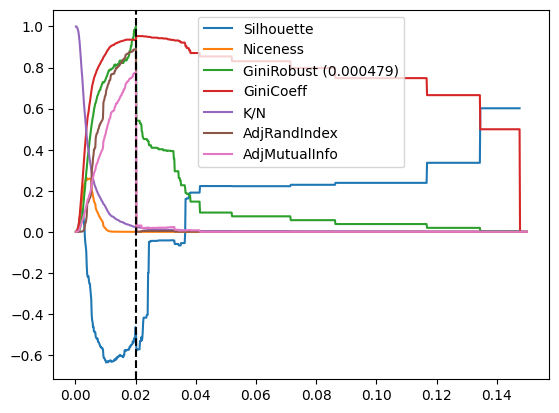

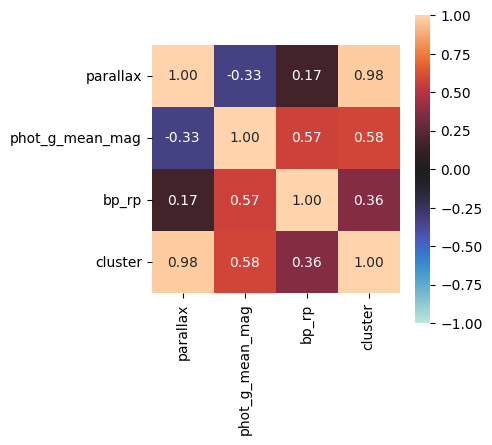

{'Silhouette': -0.4660618940409146, 'Niceness': 8.994130342896275e-12, 'GiniRobust': 0.0004785921693203886, 'GiniCoeff': 0.933337561171534, 'K/N': 0.02334823646299056, 'sample': {'eps': 0.020099999999999996, 'min_samples': 1}, 'counts_dict': {0: 905, 1: 1, 2: 1021, 3: 1, 4: 4, 5: 2, 6: 1, 7: 7, 8: 1, 9: 6, 10: 2, 11: 2, 12: 3, 13: 1, 14: 1, 15: 1, 16: 1, 17: 1, 18: 1, 19: 1, 20: 1, 21: 1, 22: 1, 23: 1, 24: 1, 25: 1, 26: 1, 27: 1, 28: 1, 29: 21, 30: 1, 31: 2, 32: 1, 33: 1, 34: 2, 35: 1, 36: 2, 37: 1, 38: 1, 39: 1, 40: 1, 41: 1, 42: 1, 43: 1, 44: 1, 45: 1, 46: 1}, 'AdjRandIndex': 0.8909669840902742, 'AdjMutualInfo': 0.777990722269651}


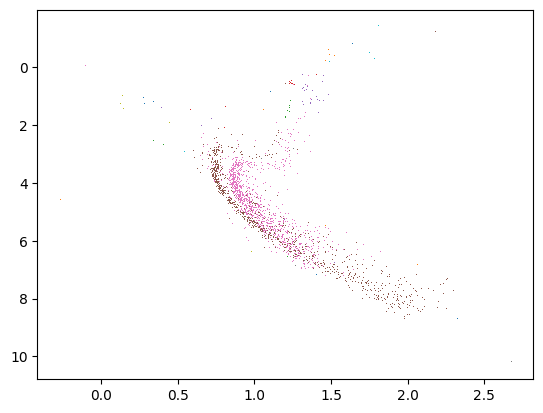

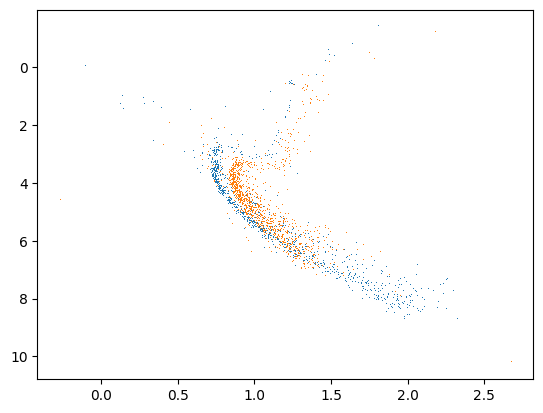

In [13]:
m67 = pd.read_csv("archive-8/m67_filtered.csv")
m67["cluster"] = "m67"
ngc188 = pd.read_csv("archive-8/NGC188_filtered.csv")
ngc188["cluster"] = "ngc188"
stars = pd.concat([m67, ngc188], axis=0)

prlx = stars.iloc[:, 0]  #Parallax
gmag = stars.iloc[:, 1]  #G-band magnitude
bpmrp = stars.iloc[:, 2] #BP minus RP color
d = 1.0/prlx       #kiloparsecs
y = gmag - 5.0*np.log10(d/0.01)

stars_ = optimize_dbscan(stars.drop("cluster", axis=1), stars.cluster,
                         factor=0.15, precomputed=True, chunksize=20)

clusters, counts = np.unique(stars_.cluster, return_counts=True)
for cluster in clusters[np.argsort(counts)]:
    plt.plot(bpmrp[stars_.cluster == cluster], y[stars_.cluster == cluster], ",")
plt.gca().invert_yaxis()
plt.show()

plt.plot(bpmrp[stars.cluster.str.endswith("m67")], y[stars.cluster.str.endswith("m67")], ",")
plt.plot(bpmrp[stars.cluster.str.endswith("ngc188")], y[stars.cluster.str.endswith("ngc188")], ",")
plt.gca().invert_yaxis()
plt.show()


Let's redo that one, using feature importance to weight the distance matrix.

As one might expect, weighting by feature importance improves the result.

[] [0.72033658 0.13331719 0.14634623]


  0%|          | 0/2013 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

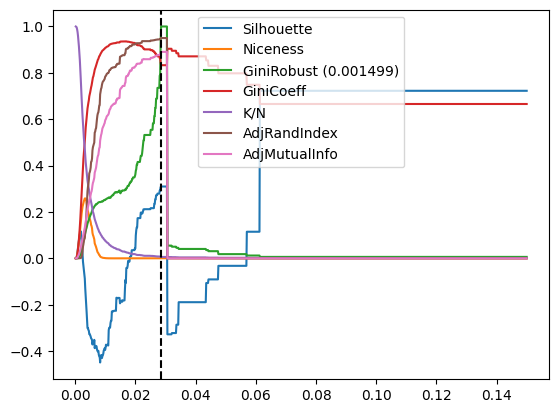

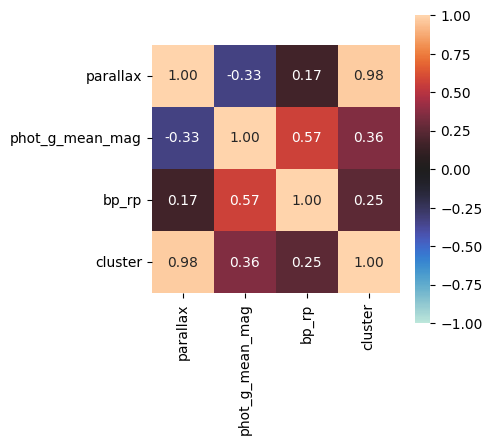

{'Silhouette': 0.3097620923696001, 'Niceness': 0.00043623448463037676, 'GiniRobust': 0.0014994230148400154, 'GiniCoeff': 0.8329607550919026, 'K/N': 0.005961251862891207, 'sample': {'eps': 0.0285, 'min_samples': 1}, 'counts_dict': {0: 940, 1: 1060, 2: 4, 3: 1, 4: 1, 5: 1, 6: 1, 7: 1, 8: 1, 9: 1, 10: 1, 11: 1}, 'AdjRandIndex': 0.9500206130090363, 'AdjMutualInfo': 0.8904905458273582}


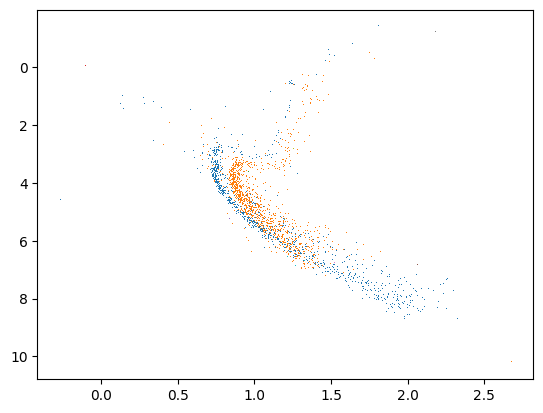

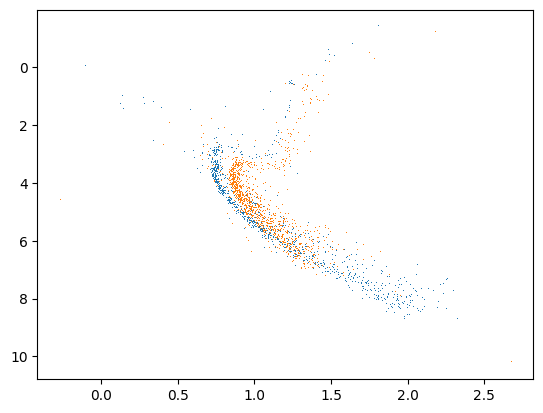

In [14]:
clf = RandomForestClassifier(random_state=0)
clf.fit(stars.iloc[:, :-1], stars.cluster)

stars_ = optimize_dbscan(stars.drop("cluster", axis=1), stars.cluster,
                         factor=0.15, precomputed=True,
                         weight_num=clf.feature_importances_, chunksize=20)

clusters, counts = np.unique(stars_.cluster, return_counts=True)
for cluster in clusters[np.argsort(counts)]:
    plt.plot(bpmrp[stars_.cluster == cluster], y[stars_.cluster == cluster], ",")
plt.gca().invert_yaxis()
plt.show()

plt.plot(bpmrp[stars.cluster.str.endswith("m67")], y[stars.cluster.str.endswith("m67")], ",")
plt.plot(bpmrp[stars.cluster.str.endswith("ngc188")], y[stars.cluster.str.endswith("ngc188")], ",")
plt.gca().invert_yaxis()
plt.show()

# Correlation Ratio

  0%|          | 0/12 [00:00<?, ?it/s]

[1. 1.] [3.11408153 2.23606798 1.94661024 4.68286606 2.9017289  3.97290493
 4.         5.16292731 1.32467556 1.41421356 2.19227642 3.20879561]


  0%|          | 0/77 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

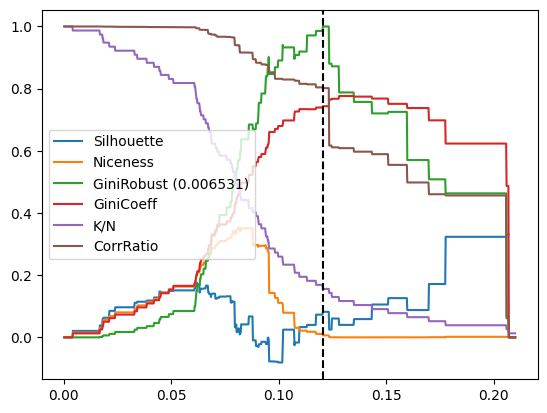

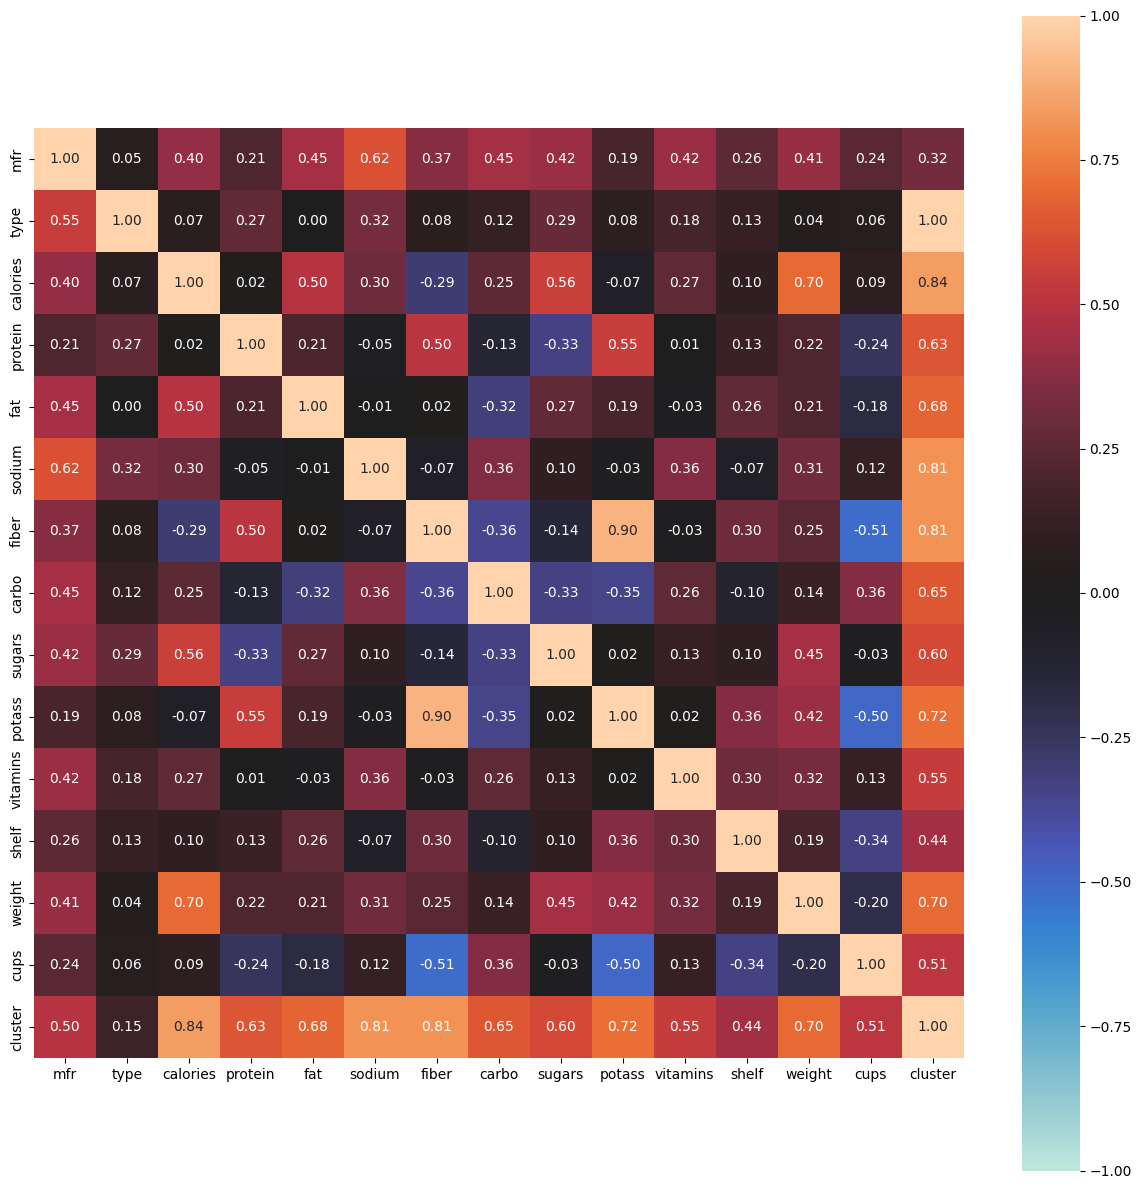

{'Silhouette': 0.08213465261376297, 'Niceness': 0.006430941530997228, 'GiniRobust': 0.006530843944476723, 'GiniCoeff': 0.7435064935064936, 'K/N': 0.15584415584415584, 'sample': {'eps': 0.12054, 'min_samples': 1}, 'counts_dict': {0: 2, 1: 1, 2: 1, 3: 58, 4: 1, 5: 1, 6: 6, 7: 1, 8: 2, 9: 2, 10: 1, 11: 1}, 'CorrRatio': 0.8017077667836411}


In [15]:
cereal = pd.read_csv("cereal.csv", index_col="name")

cereal_ = optimize_dbscan(cereal.drop("rating", axis=1), cereal.rating,
                          factor=0.21, precomputed=True, chunksize=20)

  0%|          | 0/5 [00:00<?, ?it/s]

[1. 1. 1. 1. 1. 1.] [9.52153311 2.23606798 1.73205081 1.73205081 1.73205081]


  0%|          | 0/546 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

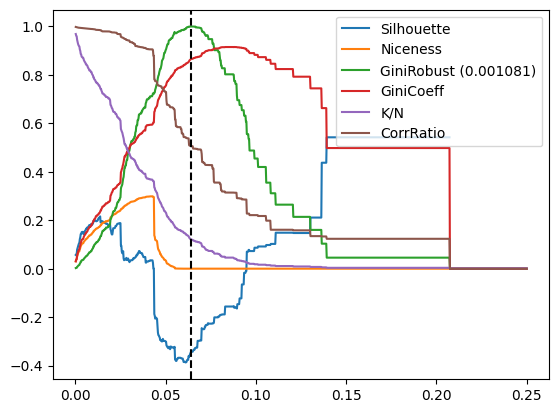

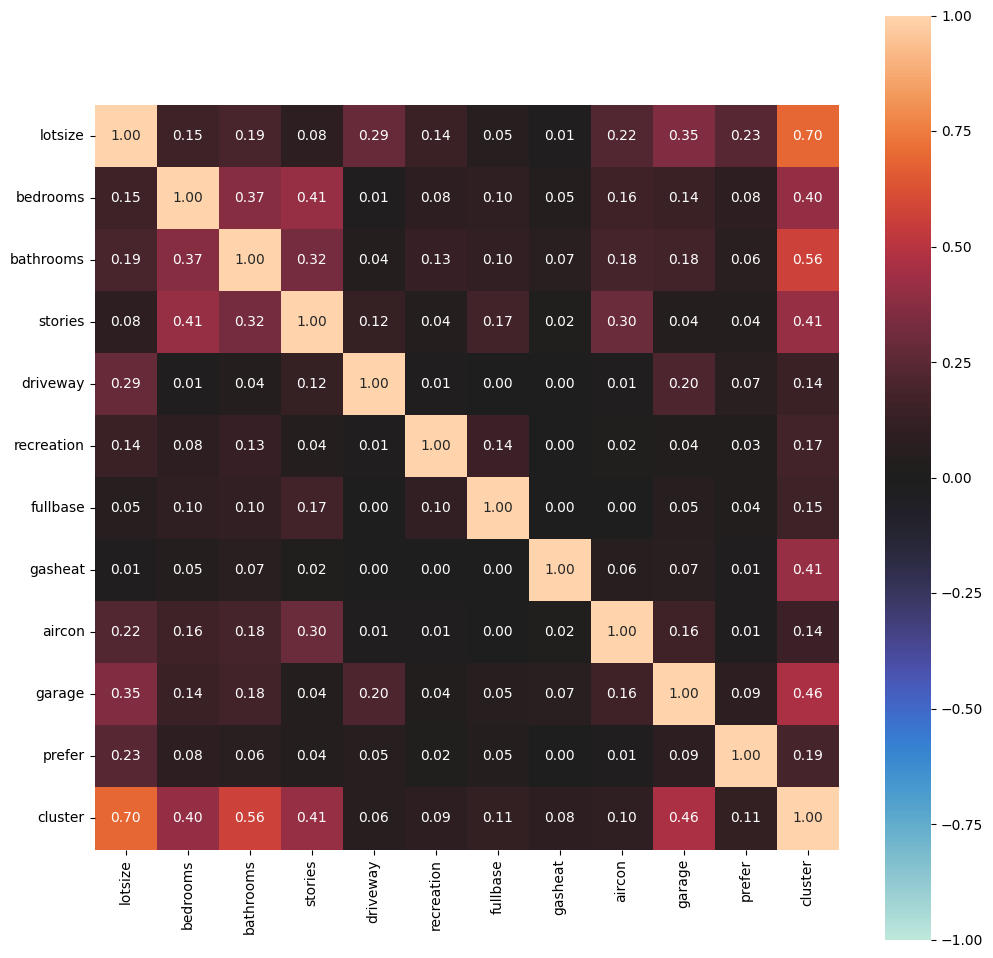

{'Silhouette': -0.34278876576828055, 'Niceness': 4.424999123456696e-06, 'GiniRobust': 0.0010810388353220072, 'GiniCoeff': 0.8664976049591434, 'K/N': 0.11904761904761904, 'sample': {'eps': 0.06425, 'min_samples': 1}, 'counts_dict': {0: 476, 1: 1, 2: 1, 3: 1, 4: 1, 5: 1, 6: 1, 7: 1, 8: 1, 9: 1, 10: 1, 11: 1, 12: 1, 13: 1, 14: 1, 15: 1, 16: 1, 17: 1, 18: 1, 19: 1, 20: 1, 21: 1, 22: 1, 23: 1, 24: 1, 25: 2, 26: 1, 27: 1, 28: 1, 29: 1, 30: 1, 31: 1, 32: 1, 33: 3, 34: 1, 35: 1, 36: 1, 37: 1, 38: 1, 39: 2, 40: 1, 41: 1, 42: 1, 43: 2, 44: 1, 45: 1, 46: 1, 47: 1, 48: 1, 49: 1, 50: 1, 51: 1, 52: 1, 53: 1, 54: 1, 55: 1, 56: 1, 57: 1, 58: 1, 59: 1, 60: 2, 61: 1, 62: 1, 63: 1, 64: 1}, 'CorrRatio': 0.5056420989299185}


In [16]:
house = pd.read_csv("HousePrices_Canada.csv", index_col=0)

house_ = optimize_dbscan(house.drop("price", axis=1), house.price, precomputed=True,
                         factor=0.25, chunksize=20)


(977, 12)
Model Name                  488
Category                      6
Screen Size                  18
Screen                       38
CPU                         106
RAM                           8
 Storage                     36
GPU                          98
Operating System              7
Operating System Version      5
Weight                      166
Price                       639
dtype: int64


  0%|          | 0/3 [00:00<?, ?it/s]

[1. 1. 1. 1. 1. 1.] [3.58239555 2.57960695 9.76533587]


  0%|          | 0/977 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

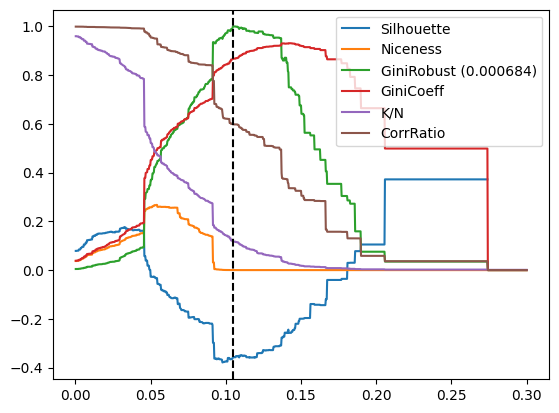

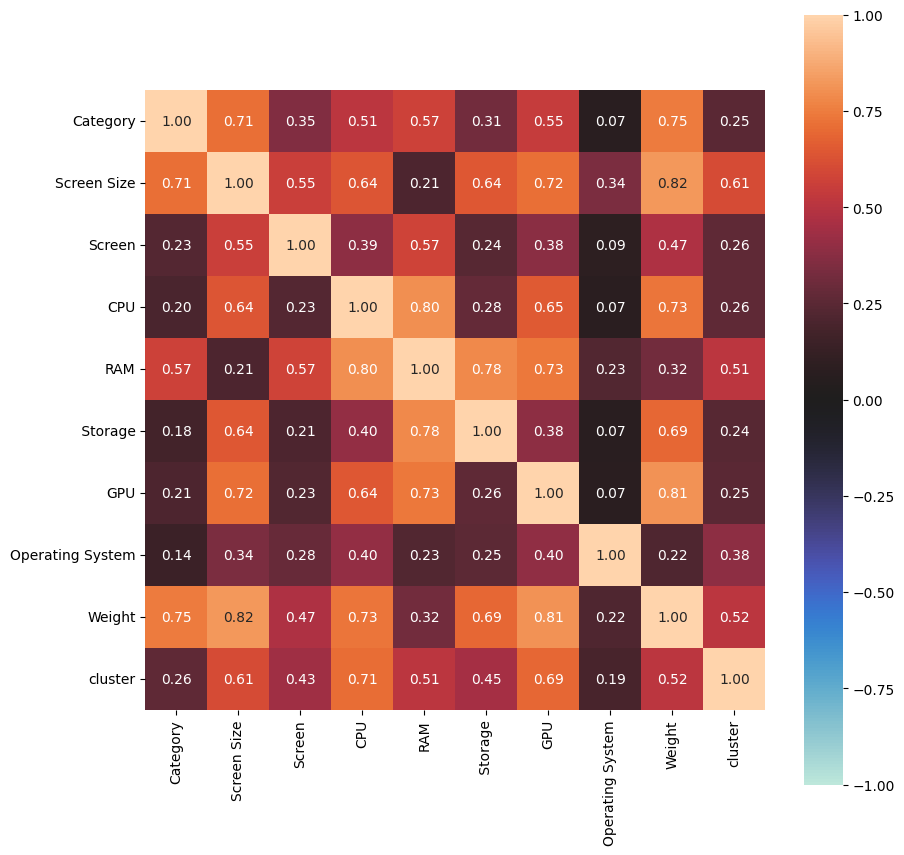

{'Silhouette': -0.3576411944591201, 'Niceness': 2.2139039252968347e-05, 'GiniRobust': 0.0006842974866466143, 'GiniCoeff': 0.8680260015442907, 'K/N': 0.11668372569089049, 'sample': {'eps': 0.1047, 'min_samples': 1}, 'counts_dict': {0: 6, 1: 4, 2: 815, 3: 2, 4: 1, 5: 2, 6: 1, 7: 2, 8: 8, 9: 2, 10: 2, 11: 1, 12: 1, 13: 1, 14: 1, 15: 1, 16: 1, 17: 2, 18: 2, 19: 3, 20: 1, 21: 1, 22: 1, 23: 1, 24: 2, 25: 1, 26: 1, 27: 1, 28: 1, 29: 1, 30: 1, 31: 1, 32: 2, 33: 1, 34: 1, 35: 1, 36: 1, 37: 2, 38: 2, 39: 3, 40: 2, 41: 1, 42: 1, 43: 1, 44: 4, 45: 1, 46: 1, 47: 1, 48: 2, 49: 8, 50: 1, 51: 1, 52: 1, 53: 1, 54: 1, 55: 2, 56: 1, 57: 2, 58: 1, 59: 1, 60: 1, 61: 2, 62: 3, 63: 1, 64: 1, 65: 2, 66: 2, 67: 1, 68: 1, 69: 1, 70: 1, 71: 1, 72: 1, 73: 1, 74: 1, 75: 1, 76: 1, 77: 1, 78: 1, 79: 1, 80: 1, 81: 1, 82: 1, 83: 1, 84: 1, 85: 1, 86: 1, 87: 1, 88: 1, 89: 1, 90: 1, 91: 1, 92: 1, 93: 1, 94: 1, 95: 1, 96: 1, 97: 1, 98: 1, 99: 1, 100: 1, 101: 1, 102: 1, 103: 1, 104: 1, 105: 1, 106: 1, 107: 1, 108: 1, 109: 

In [17]:
laptops = pd.read_csv("laptops/laptops_train.csv", index_col=0)
print(laptops.shape)
print(laptops.apply(lambda col: col.unique(), axis=0).apply(len))
laptops.drop(["Operating System Version", "Model Name"], axis=1, inplace=True)
laptops.RAM = np.log2(laptops.RAM.str[:-2].astype(float))  # all in GB
laptops.Weight = laptops.Weight.str[:-2].astype(float)  # all in kg
laptops["Screen Size"] = laptops["Screen Size"].str[:-1].astype(float)  # all in inches
laptops_ = optimize_dbscan(laptops.drop("Price", axis=1), laptops.Price, factor=0.3, precomputed=True, chunksize=20)


  0%|          | 0/7 [00:00<?, ?it/s]

[1.] [ 6.96600702 15.81850063 19.80317048  8.75886851  7.04872174  8.23989285
  3.        ]


  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

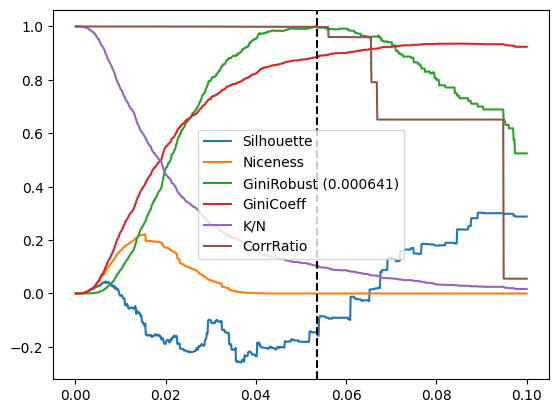

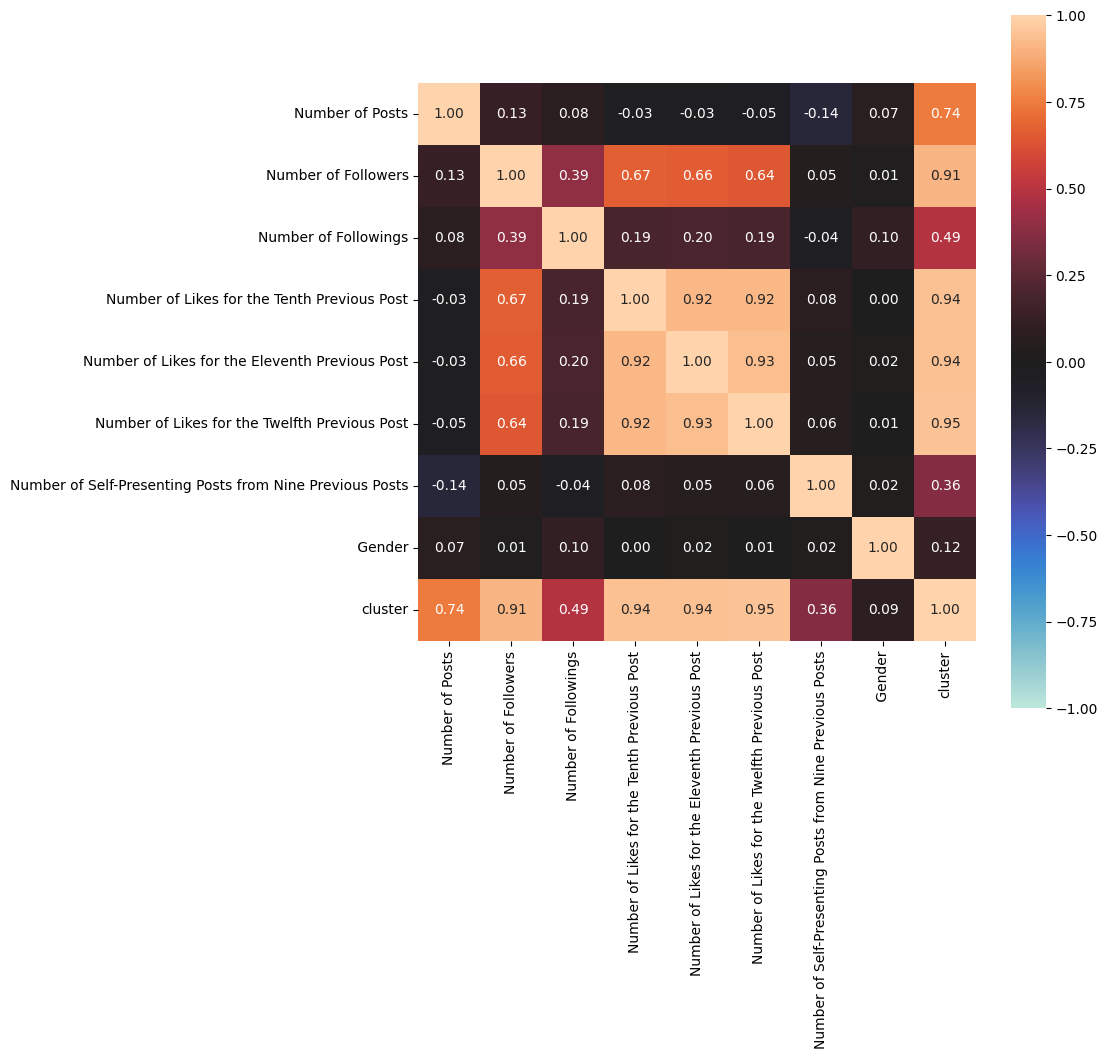

{'Silhouette': -0.1472702145314195, 'Niceness': 6.905333257322479e-07, 'GiniRobust': 0.0006413131276984308, 'GiniCoeff': 0.8850384615384616, 'K/N': 0.104, 'sample': {'eps': 0.0535, 'min_samples': 1}, 'counts_dict': {0: 872, 1: 2, 2: 2, 3: 3, 4: 1, 5: 1, 6: 10, 7: 2, 8: 1, 9: 1, 10: 1, 11: 1, 12: 1, 13: 1, 14: 1, 15: 1, 16: 1, 17: 1, 18: 3, 19: 1, 20: 1, 21: 1, 22: 1, 23: 1, 24: 1, 25: 2, 26: 1, 27: 3, 28: 1, 29: 1, 30: 2, 31: 1, 32: 1, 33: 2, 34: 1, 35: 1, 36: 1, 37: 1, 38: 1, 39: 1, 40: 1, 41: 1, 42: 1, 43: 1, 44: 1, 45: 1, 46: 2, 47: 1, 48: 1, 49: 1, 50: 2, 51: 1, 52: 1, 53: 1, 54: 1, 55: 1, 56: 1, 57: 1, 58: 1, 59: 1, 60: 1, 61: 1, 62: 1, 63: 1, 64: 1, 65: 1, 66: 1, 67: 1, 68: 2, 69: 1, 70: 1, 71: 1, 72: 1, 73: 1, 74: 1, 75: 1, 76: 2, 77: 1, 78: 1, 79: 1, 80: 1, 81: 1, 82: 1, 83: 1, 84: 1, 85: 1, 86: 1, 87: 1, 88: 1, 89: 1, 90: 1, 91: 1, 92: 1, 93: 1, 94: 1, 95: 1, 96: 1, 97: 1, 98: 1, 99: 1, 100: 1, 101: 1, 102: 1, 103: 1}, 'CorrRatio': 0.9984148659765137}


In [18]:
instagram = pd.read_excel("MainDataset- Instagram.xlsx", index_col=0)
instagram["ratio"] = instagram["Number of Followers"] / instagram["Number of Followings"]

instagram = optimize_dbscan(instagram.drop("ratio", axis=1), instagram["ratio"],
                            factor=0.1, precomputed=True, chunksize=20)
